<a href="https://colab.research.google.com/github/GenAIUnplugged/tensorflow_series/blob/main/mnist_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPool2D
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split

In [9]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [10]:
x_train_new, x_val, y_train_new, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [12]:
sc = StandardScaler()
x_train_new = sc.fit_transform(x_train_new.reshape(-1,28*28)).reshape(-1,28,28,1)
x_test = sc.transform(x_test.reshape(-1,28*28)).reshape(-1,28,28,1)

In [13]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [15]:
# Define the checkpoint filepath
checkpoint_filepath = '/tmp/checkpoint'

In [16]:
model.fit(
    x_train_new,
    y_train_new,
    epochs=10,
    validation_data=(x_val,y_val),
    batch_size=128
)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 104ms/step - accuracy: 0.8662 - loss: 0.4506 - val_accuracy: 0.9442 - val_loss: 8.7888
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 43s 109ms/step - accuracy: 0.9815 - loss: 0.0592 - val_accuracy: 0.9298 - val_loss: 12.4876
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 40s 105ms/step - accuracy: 0.9889 - loss: 0.0364 - val_accuracy: 0.9550 - val_loss: 8.2772
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 105ms/step - accuracy: 0.9923 - loss: 0.0258 - val_accuracy: 0.9546 - val_loss: 9.6016
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 105ms/step - accuracy: 0.9935 - loss: 0.0219 - val_accuracy: 0.9192 - val_loss: 21.5300
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 39s 104ms/step - accuracy: 0.9956 - loss: 0.0131 - val_accuracy: 0.9669 - val_loss: 7.6649
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 43s 110ms/step - accuracy: 0.9963 - loss: 0.0116 - val_accuracy: 0.9603 - val_loss: 9.3071
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 39s 104ms/step - accuracy: 0.9973 - loss:

In [24]:
# Get the list of weights and biases for each layer
model_weights = model.get_weights()

# Print the shape and some values for inspection
for i, layer_weights in enumerate(model_weights):
    print(f"Layer {i} - Shape: {layer_weights.shape}")
    # Print a few values from the layer weights/biases
    if layer_weights.size > 0:
        print(f"Layer {i} - Sample values:\n{layer_weights.flatten()[:5]}")
    print("-" * 20)

Layer 0 - Shape: (3, 3, 1, 32)
Layer 0 - Sample values:
[ 0.14184316 -0.21053757 -0.0680206   0.12335599 -0.0916498 ]
--------------------
Layer 1 - Shape: (32,)
Layer 1 - Sample values:
[0.01370368 0.00706535 0.06172644 0.019876   0.00914874]
--------------------
Layer 2 - Shape: (3, 3, 32, 64)
Layer 2 - Sample values:
[ 0.10714962  0.01407541  0.10546811  0.03075786 -0.01450987]
--------------------
Layer 3 - Shape: (64,)
Layer 3 - Sample values:
[ 0.03622095 -0.0257828   0.02129462 -0.03870491 -0.00623287]
--------------------
Layer 4 - Shape: (1600, 128)
Layer 4 - Sample values:
[ 0.03927376 -0.05234354 -0.01468014 -0.00717736 -0.02556379]
--------------------
Layer 5 - Shape: (128,)
Layer 5 - Sample values:
[ 0.01592277 -0.0231456  -0.02007629  0.02565846  0.00965368]
--------------------
Layer 6 - Shape: (128, 10)
Layer 6 - Sample values:
[-0.23013721  0.00883069  0.12324438  0.09252291  0.09387052]
--------------------
Layer 7 - Shape: (10,)
Layer 7 - Sample values:
[-0.00731288

In [17]:
loss,acc = model.evaluate(x_train,y_train)
loss,acc

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9165 - loss: 24.0142


(24.216583251953125, 0.9187666773796082)

In [18]:
loss,acc = model.evaluate(x_test,y_test)
loss,acc

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9847 - loss: 0.0636


(0.04996538534760475, 0.9882000088691711)

In [19]:
from sklearn.metrics import classification_report
y_pred = model.predict(x_test)
y_pred = tf.argmax(y_pred,axis=1)
print(classification_report(y_test,y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       1.00      0.98      0.99      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.98       892
           6       0.99      0.98      0.99       958
           7       0.98      1.00      0.99      1028
           8       0.99      0.98      0.98       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



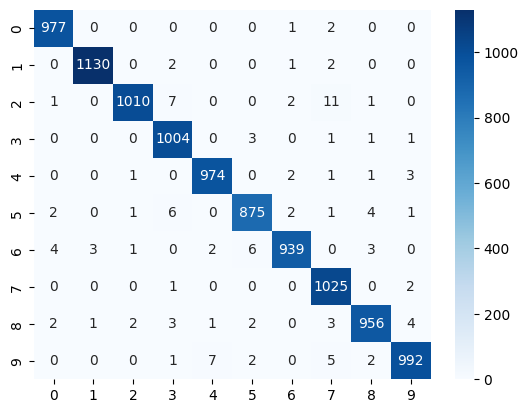

In [20]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Use seaborn.heatmap instead of plt.heatmap
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d', cmap='Blues')
plt.show()